气温会随着海拔高度的升高而降低, 我们可以通过测量不同海拔高度的气温来预测海拔高度和气温的关系. 
我们假设海拔高度和气温的关系可以使用如下公式表达: y(气温) = w * x(海拔高度) + b 

理论上来讲, 确定以上公式 w 和 b 的值只需在两个不同高度测试, 就可以算出来 w 和 b 的值了. 但是由于所有的设备都是有误差的, 而使用更多的高度测试的值可以使得预测的值更加准确. 

提供了在9个不同高度测量的气温值, 使用线性回归方法预测 w 和 b 的值，根据这个公式, 我们预测一下在8000米的海拔, 气温会是多少?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 获取数据

In [2]:
data = pd.read_csv("data/height.vs.temperature.csv")
data.head()

,height,temperature
0,0.0,12.834044
1,500.0,10.190649
2,1000.0,5.500229
3,1500.0,2.854665
4,2000.0,-0.706488


## 可视化分析数据

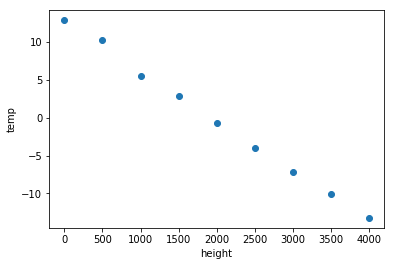

In [9]:
plt.figure()
plt.scatter(data['height'], data['temperature'])
plt.xlabel("height")
plt.ylabel("temp")
plt.show()

## 简单线性回归求导求解
#### 最小二乘法就是试图找到一条直线，使得所有样本到直线上的欧式距离之和最小
#### $f(x_i) = w x_i + b_i$ 使得 $f(x_i) 接近 y_i$
#### 这里不做推导，直接拿结果，要看推导 [这里](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)
#### $SS_{xy} = \sum_{i=1}^{m}(x_{i}-\overline{x})(y_{i}-\overline{y}) = \sum_{i=1}^{m}y_ix_i - m \overline x \ \ \overline y$
#### $SS_{xx} = \sum_{i=1}^{m}(x_{i}-\overline{x})^{2} = \sum_{i=1}^{m}x_i^2 - m(\overline x)^2$
#### $w = \frac{SS_{xy}}{SS_{xx}}$
#### $b = \overline y - w \overline x$

In [10]:
def mylr(x, y): 
    m = np.size(x)
    
    # x和y向量的平均值
    m_x, m_y = np.mean(x), np.mean(y) 
    
    SS_xy = np.sum((x - m_x) * (y - m_y)) 
    SS_xx = np.sum((x - m_x) ** 2)
    
    # 计算回归系数
    w = SS_xy / SS_xx
    
    b = m_y - w*m_x 
    
    return w, b

# 预测 y = wx + b
def predict(w, b, x):
    return (w*x + b)

In [11]:
X = data['height'].values.reshape(-1, 1)
y = data['temperature'].values.reshape(-1, 1)

w, b = LinearRegression(X, y)

In [12]:
print('w = {:.5}'.format(w))
print('b = {:.5}'.format(b))

print("线性模型为: Y = {:.5} X + {:.5} ".format(w, b))

w = -0.0065695
b = 12.719
线性模型为: Y = -0.0065695 X + 12.719 


In [16]:
from sklearn.linear_model import LinearRegression
# sklearn 库的LR函数
X = data['height'].values.reshape(-1,1)
y = data['temperature'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

print('a = {:.5}'.format(reg.coef_[0][0]))
print('b = {:.5}'.format(reg.intercept_[0]))

print("线性模型为: Y = {:.5}X + {:.5} ".format(reg.coef_[0][0], reg.intercept_[0]))

sklearn 库输出:

a = -0.0065695
b = 12.719
线性模型为: Y = -0.0065695X + 12.719 


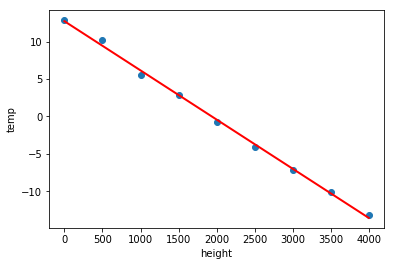

In [13]:
pred_Y = predict(w, b, X)
plt.figure()
plt.scatter(data['height'], data['temperature'])
plt.plot(data['height'], pred_Y, c ='red', linewidth=2)
plt.xlabel("height")
plt.ylabel("temp")
plt.show()

预测一下在8000米的海拔, 气温会是多少?

In [17]:
pred = predict(w, b, 8000)
print('在8000米的海拔, 大概气温是:', pred)

在8000米的海拔, 大概气温是: -39.83776550281288


In [19]:
predictions = reg.predict([[8000],])
print('在8000米的海拔, 大概气温是:', pred)

在8000米的海拔, 大概气温是: -39.83776550281288
